In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving household_power_consumption[1].txt to household_power_consumption[1].txt


In [ ]:
# importing dataset
import io
df2 = pd.read_csv('household_power_consumption[1].txt', sep=';', parse_dates={'DATE' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, index_col='DATE')
df2.head()


                      

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df2.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.0
2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.0
2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.0
2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.0
2010-11-26 21:02:00,0.932,0.000,239.550,3.800,0.000,0.000,0.0


In [ ]:
df2.shape

(2075259, 7)

In [ ]:
print('sum of missing item in DATE/Time column: ' + str(df2.index.isnull().sum()))
print('shape of datetime: '+ str(df2.index.shape))

sum of missing item in DATE/Time column: 0
shape of datetime: (2075259,)


In [ ]:
df2.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
#replacing the '?' in every column present with NAN
df2.replace('?',np.nan, inplace=True)


In [ ]:
df2.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [ ]:
df2.describe(include="all")

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2049280,2049280,2049280,2049280,2049280,2.049280e+06
unique,4186,532,2837,221,88,81,NaN
top,0.218,0.000,241.180,1.000,0.000,0.000,NaN
freq,9565,481561,3559,172785,1880175,1436830,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,6.458447e+00
std,NaN,NaN,NaN,NaN,NaN,NaN,8.437154e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+01


In [20]:
df2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DATE,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [22]:
# Converting the dtypes of all columns to float32
columns = list(df2.columns)

for col in columns:
    df2[col] = df2[col].astype(str).astype('float32')

In [24]:
df2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [25]:
df2.dtypes

Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtype: object

In [26]:
df2.fillna(df2.mean(),inplace=True)

In [28]:
df2.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [29]:
# Resampling to "Daily" from minute sampling
df2_daily = df2.resample('D').sum()

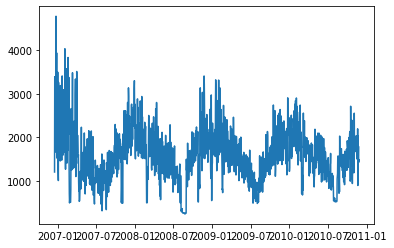

In [30]:
# Plotting daily Global_Active_power over time
plt.plot(df2_daily.index,df2_daily.Global_active_power)

In [34]:
#checking for correlation between Global_active_power and Global_reactive_power¶
from scipy.stats import pearsonr
corr1,_ = pearsonr(df2['Global_active_power'], df2['Global_reactive_power'])
print('Pearsons correlation: %.2f' % corr1)

Pearsons correlation: 0.04


In [35]:
from scipy.stats import pearsonr

corr2, _ = pearsonr(df2['Voltage'], df2['Global_intensity'])
print('Pearsons correlation: %.2f' % corr2)

Pearsons correlation: -0.41


In [36]:
#Dividing into test/train sets
df2_daily.reset_index(inplace=True)
x_test = df2_daily.tail(365)
x_train = df2_daily[:-365]

df2_daily.dtypes

DATE                     datetime64[ns]
Global_active_power             float32
Global_reactive_power           float32
Voltage                         float32
Global_intensity                float32
Sub_metering_1                  float32
Sub_metering_2                  float32
Sub_metering_3                  float32
dtype: object

In [46]:
#Using Facebook Prophet method
df2_temp = df2_daily[['DATE','Global_active_power']]
# Renaming the columns
df2_new = df2_temp.rename(columns={"DATE": "ds", "Global_active_power": "y"})
from fbprophet import Prophet
x_test_new = df2_new.tail(365)
x_train_new = df2_new[:-365]

In [47]:
# Building the model
model = Prophet()
# fitting the model
model.fit(x_train_new)
#Predicting the data
future = model.make_future_dataframe(periods=365 , freq= 'D' )
new_result = model.predict(future)

new_result.shape

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


(1442, 19)

In [48]:
new_result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,1650.071328,1829.922044,2963.786110,1650.071328,1650.071328,775.004842,775.004842,775.004842,245.813256,245.813256,245.813256,529.191586,529.191586,529.191586,0.0,0.0,0.0,2425.076170
1,2006-12-17,1649.910702,1849.614302,2991.675374,1649.910702,1649.910702,771.844221,771.844221,771.844221,228.519177,228.519177,228.519177,543.325044,543.325044,543.325044,0.0,0.0,0.0,2421.754924
2,2006-12-18,1649.750077,1486.630038,2625.001767,1649.750077,1649.750077,397.001867,397.001867,397.001867,-161.286790,-161.286790,-161.286790,558.288657,558.288657,558.288657,0.0,0.0,0.0,2046.751944
3,2006-12-19,1649.589452,1664.803978,2787.396661,1649.589452,1649.589452,544.306666,544.306666,544.306666,-29.332428,-29.332428,-29.332428,573.639094,573.639094,573.639094,0.0,0.0,0.0,2193.896118
4,2006-12-20,1649.428826,1682.056799,2774.565048,1649.428826,1649.428826,564.208290,564.208290,564.208290,-24.708851,-24.708851,-24.708851,588.917141,588.917141,588.917141,0.0,0.0,0.0,2213.637116


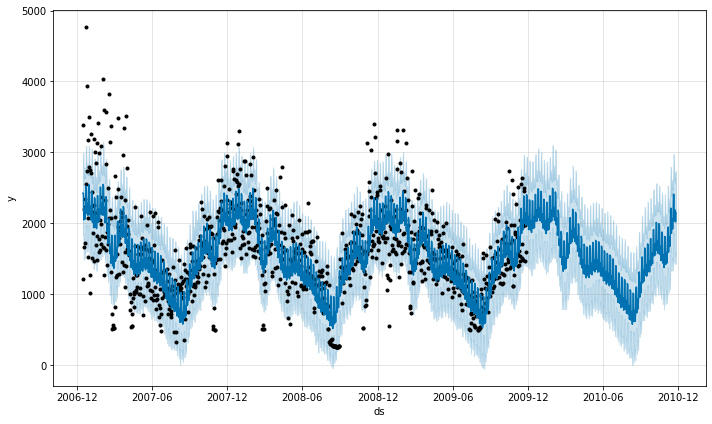

In [49]:
# Plotting the Graph
model.plot(new_result)
plt.show()


In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
# MAPE Value
mean_absolute_percentage_error(x_test_new['y'], new_result['yhat'][-365:])

20.815831963532684

In [52]:
# RMSE Calculation
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(x_test_new['y'], new_result['yhat'][-365:]))
print(rmse)

374.604233946713


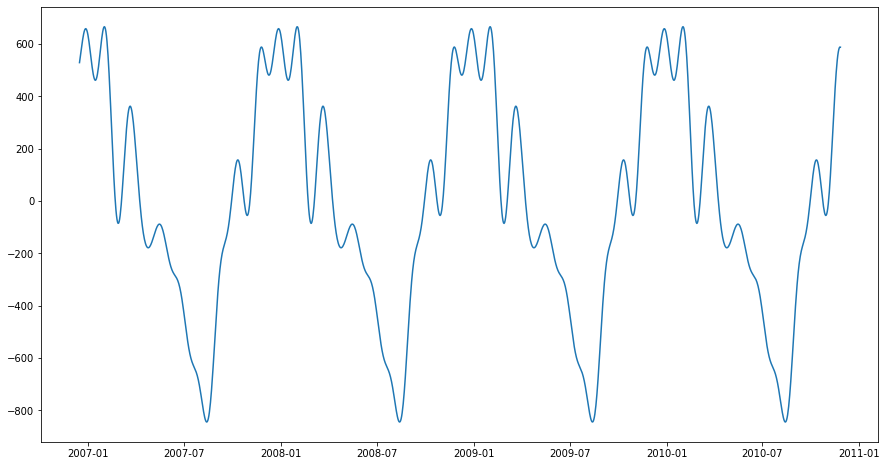

In [54]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize']= 15, 8

plt.plot(new_result['ds'],new_result['yearly'])
plt.show()

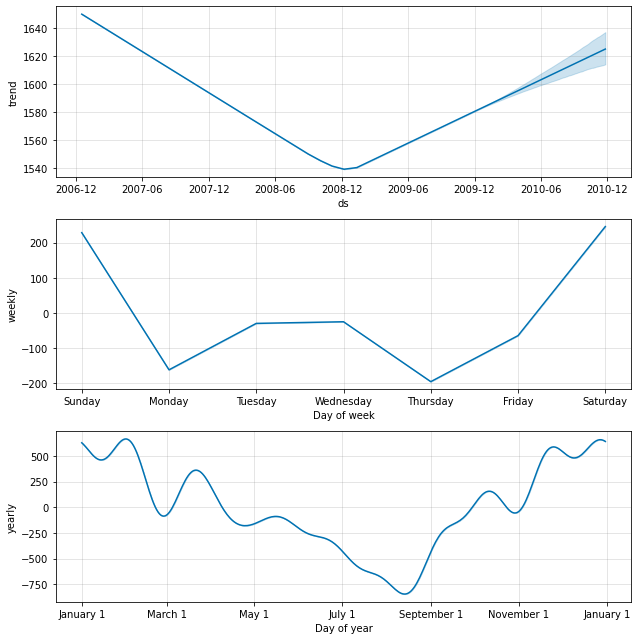

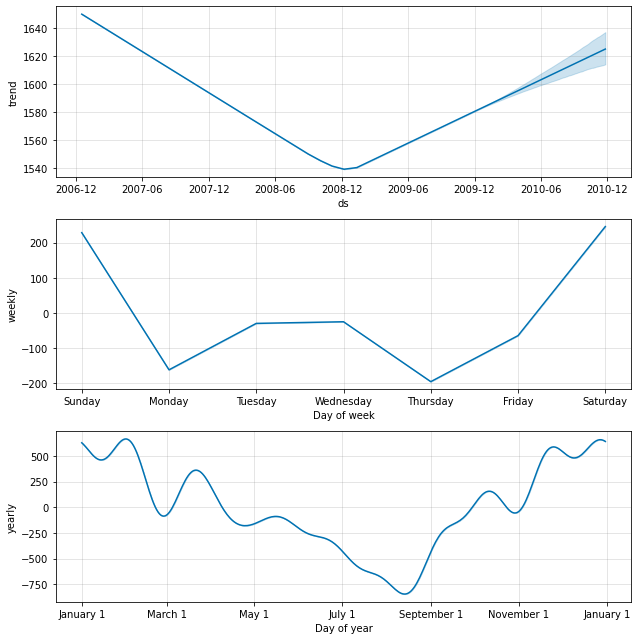

In [55]:
model.plot_components(new_result)

In [67]:
new_df2 = df2_daily.copy()
# Creating a new dataframe from df2_daily & renaming the columns

new_df2_multi= new_df2.rename(columns={"DATE": "ds", "Global_active_power": "y","Global_reactive_power": "add1","Voltage": "add2","Global_intensity": "add3","Sub_metering_1": "add4","Sub_metering_2": "add5","Sub_metering_3": "add6"})

In [68]:
x_test_multi = new_df2_multi.tail(365)
x_train_multi = new_df2_multi[:-365]

In [69]:
x_train_multi

,ds,y,add1,add2,add3,add4,add5,add6
0,2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
1,2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2,2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
3,2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
4,2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...,...
1072,2009-11-22,2450.976074,222.638000,347151.87500,10358.200195,6774.0,411.0,16097.0
1073,2009-11-23,1471.121948,148.337997,349549.50000,6100.799805,0.0,402.0,8230.0
1074,2009-11-24,2128.855957,153.820007,348446.18750,8899.000000,2491.0,4579.0,9086.0
1075,2009-11-25,1980.130005,175.475998,347297.43750,8309.200195,745.0,5083.0,10596.0


In [70]:
# Building Model - Prophet & Adding regressors
model_multi = Prophet()
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')

In [71]:
model_multi.fit(x_train_multi)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
future_multi = model_multi.make_future_dataframe(periods=365,freq='D')
future_multi['add1'] = new_df2_multi['add1'].values
future_multi['add2'] = new_df2_multi['add2'].values
future_multi['add3'] = new_df2_multi['add3'].values
future_multi['add4'] = new_df2_multi['add4'].values
future_multi['add5'] = new_df2_multi['add5'].values
future_multi['add6'] = new_df2_multi['add6'].values
f_result_multi= model_multi.predict(future_multi)

In [75]:

future_multi.shape

(1442, 7)

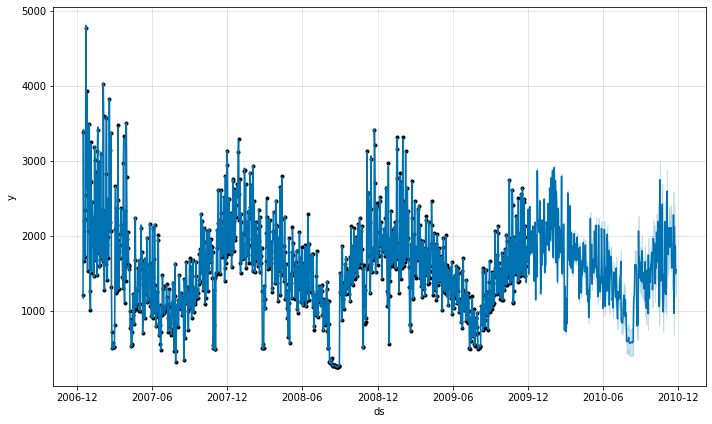

In [77]:
model_multi.plot(f_result_multi)
plt.show()

In [78]:
# MAPE
mean_absolute_percentage_error( x_test_multi['y'][-365:], f_result_multi['yhat'][-365:])

3.0445761457342444

In [84]:
# RMSE
rmse_multi = sqrt(mean_squared_error( x_test_multi['y'][-365:], f_result_multi['yhat'][-365:]))
print(rmse_multi)

44.87909204303396


In [80]:
print(x_train_new)


             ds            y
0    2006-12-16  1209.176025
1    2006-12-17  3390.459961
2    2006-12-18  2203.825928
3    2006-12-19  1666.193970
4    2006-12-20  2225.748047
...         ...          ...
1072 2009-11-22  2450.976074
1073 2009-11-23  1471.121948
1074 2009-11-24  2128.855957
1075 2009-11-25  1980.130005
1076 2009-11-26  1599.625977

[1077 rows x 2 columns]


In [81]:
print(x_train_multi)

             ds            y        add1  ...    add4    add5     add6
0    2006-12-16  1209.176025   34.922001  ...     0.0   546.0   4926.0
1    2006-12-17  3390.459961  226.005997  ...  2033.0  4187.0  13341.0
2    2006-12-18  2203.825928  161.792007  ...  1063.0  2621.0  14018.0
3    2006-12-19  1666.193970  150.942001  ...   839.0  7602.0   6197.0
4    2006-12-20  2225.748047  160.998001  ...     0.0  2648.0  14063.0
...         ...          ...         ...  ...     ...     ...      ...
1072 2009-11-22  2450.976074  222.638000  ...  6774.0   411.0  16097.0
1073 2009-11-23  1471.121948  148.337997  ...     0.0   402.0   8230.0
1074 2009-11-24  2128.855957  153.820007  ...  2491.0  4579.0   9086.0
1075 2009-11-25  1980.130005  175.475998  ...   745.0  5083.0  10596.0
1076 2009-11-26  1599.625977  141.542007  ...  2262.0   407.0  10069.0

[1077 rows x 8 columns]


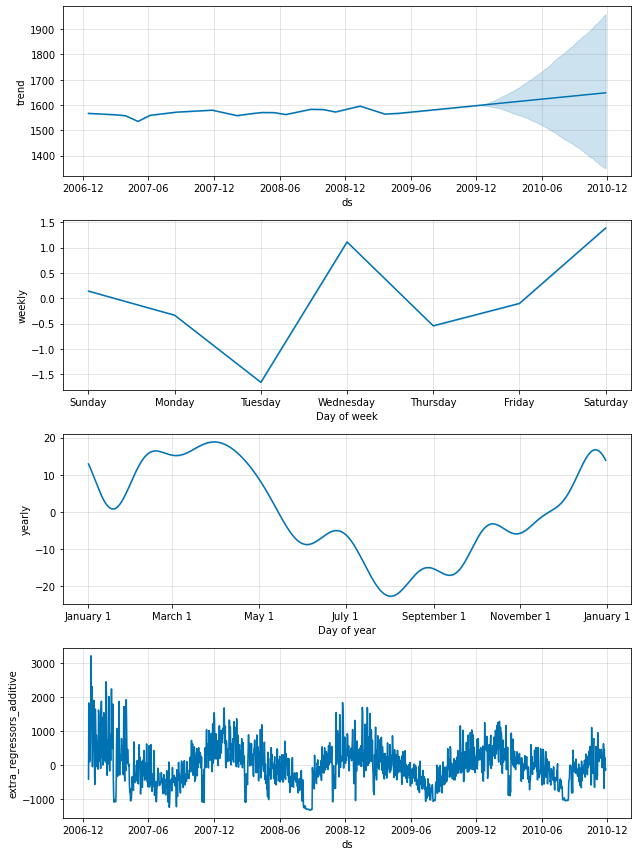

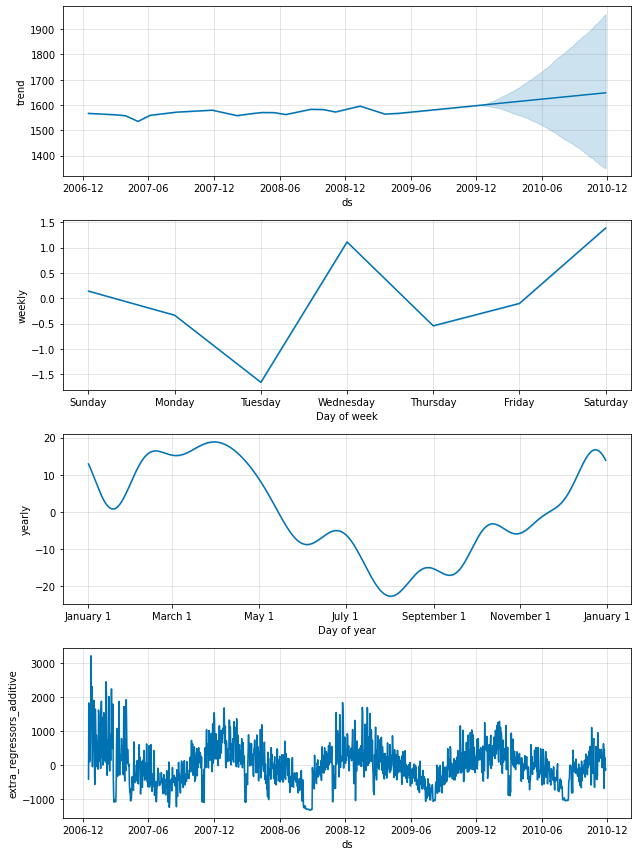

In [83]:
model_multi.plot_components(f_result_multi)